In [56]:
import xarray as xr
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import plotly.figure_factory as ff

In [57]:
#case = "BLOM_channel_new02_mix1"
case = "BLOM_channel_new05_mix1"
datapath = f"/home/alsjur/PhD/Kode/BLOM-channel-momentum/data/{case}/"

figurepath = f"/home/alsjur/PhD/Kode/BLOM-channel-momentum/figures/"

ds = xr.open_dataset(datapath+f"{case}_velocities.nc").transpose("y", "x", "depth")#.isel(y=slice(1,-1))
bath = xr.open_dataarray(datapath+f"{case}_bathymetry.nc").transpose("y", "x")#.isel(y=slice(1,-1))

In [58]:
x = bath.x*1e-3
y = bath.y*1e-3
depths = ds.depth

dx = 2
dy = 2

X, Y = np.meshgrid(x, y)
bath_z = bath.values

'\nwlim = np.max(np.abs(wc))\nax.pcolormesh(Xc, Yc, wc, vmin=-wlim, vmax=wlim, cmap="coolwarm")\nax.streamplot(Xc, Yc, uc, vc)\n'

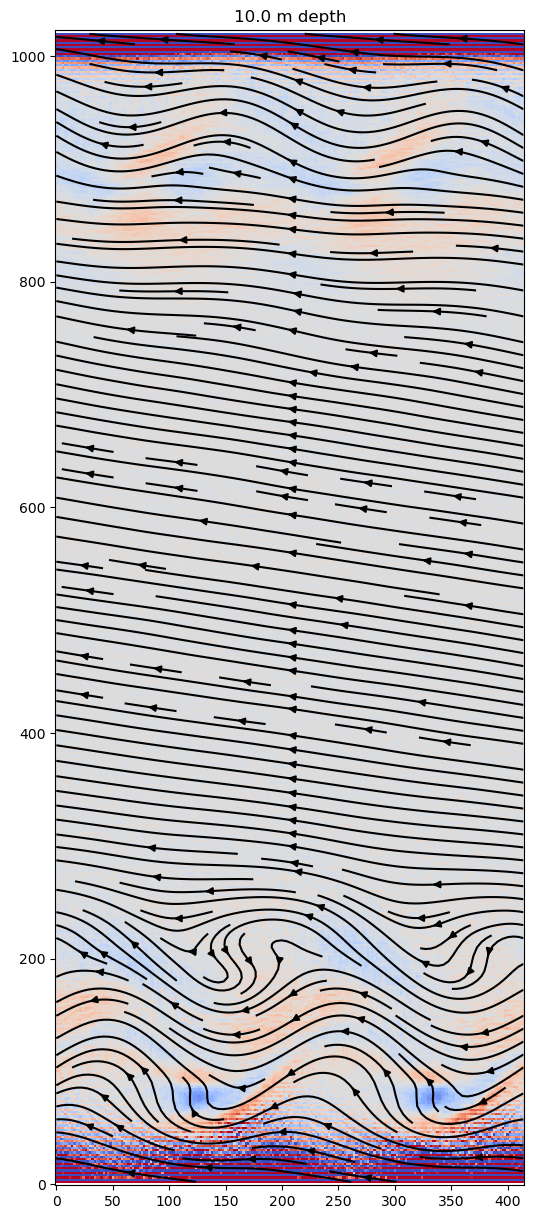

In [79]:
#idepth = 50
#dsi = ds.isel(depth=idepth)


depth = 10
dsi = ds.sel(depth=depth, method="nearest")

u = dsi.uc
v = dsi.vc
w = dsi.wc2

# coarsen dataset 
xcf = 7
ycf = 7

dsc = dsi.coarsen(x=xcf, y=ycf, boundary="trim").mean()
dsc["x"] = dsc["x"]+(xcf+1)/2*dx
dsc["y"] = dsc["y"]+(ycf+1)/2*dy

xc = dsc.x*1e-3
yc = dsc.y*1e-3
Xc, Yc = np.meshgrid(xc, yc)

uc = dsc.uc
vc = dsc.vc
wc = dsc.wc2


fig, ax = plt.subplots(figsize=(10,15))
ax.set_aspect("equal")
ax.set_title(f"{dsi.depth.values} m depth")

wlim = np.max(np.abs(w))*0.1
ax.pcolormesh(X, Y, w, vmin=-wlim, vmax=wlim, cmap="coolwarm")
ax.streamplot(X, Y, u, v, density=3, color="black")
"""
wlim = np.max(np.abs(wc))
ax.pcolormesh(Xc, Yc, wc, vmin=-wlim, vmax=wlim, cmap="coolwarm")
ax.streamplot(Xc, Yc, uc, vc)
"""

In [74]:
fig = ff.create_streamline(x, y, u, v)

PlotlyError: Oops! Your data lists or ndarrays should be the same length.